In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import io
import random

In [ ]:
with open('data.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
random.shuffle(lines)
total_lines = len(lines)
print(len(lines))
train_size = int(0.8 * total_lines)
train_data = lines[:train_size]
validation_data = lines[train_size:]
with open('train_data.txt', 'w', encoding='utf-8') as train_file:
    train_file.writelines(train_data)
with open('validation_data.txt', 'w', encoding='utf-8') as validation_file:
    validation_file.writelines(validation_data)

148712


In [ ]:
with open('train_data.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
[line for line in lines[:5]]
print(len(lines))

118969


In [ ]:
with open('validation_data.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
[line for line in lines[:5]]
print(len(lines))

29743


In [ ]:
def read_sentences(file_path):
    sentences = []
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    for line in lines:
        parts = line.strip().split(',')
        if len(parts) >= 2:
            sentence = parts[0].strip()
            sentences.append(sentence)
    return sentences

def mkHNdict(file_path):
    HanNom_dict = dict()
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    for line in lines:
        parts = line.strip().split(':')
        if len(parts) >= 2:
            word = parts[0].strip()
            readings = parts[1].strip().split(';')
            for reading in readings:
                if word in HanNom_dict:
                    HanNom_dict[word].append(reading)
                else:
                    HanNom_dict[word] = [reading]
    return HanNom_dict

train_data = 'train_data.txt'
validation_data ='validation_data.txt'
words_data = 'words.txt'

sentences = read_sentences(train_data)
HanNom_dict = mkHNdict(words_data)

In [ ]:
with open('train_data.txt', 'w', encoding='utf-8') as file:
    for sentence in sentences:
        file.write(sentence + '\n')

In [ ]:
[sentence for sentence in sentences[:5]]

['年去年來堪痛惜', '席前把盞重低徊', '近寒食雨草萋萋', '風疾舟中伏枕書懷三十六韻奉呈湖南親友', '搖落秋天酒易醒']

In [ ]:
HanNom_dict['㨪']

['hoảng']

In [ ]:
sentences_val = read_sentences(validation_data)
[sentence for sentence in sentences_val[:5]]

['卜世終期歴萬春', '夜讀昏花覺損肝', '余今委修短', '三更鼓角壯軍容', '俊傑晨星']

In [ ]:
def normalization(data):
    str = ''
    for i in range(0, len(data)):
        str += data[i]
        str += ' '
    return str

In [ ]:
def get_vocab(data):
    i = 1
    word2idx = dict()
    idx2word = dict()
    temp = set()

    for sentence in sentences:
        sentence = normalization(sentence)
        for word in sentence.split():
            if word not in temp:
              temp.add(word)
              word2idx[word] = i
              idx2word[i] = word
              i += 1
    word2idx[''] = 0
    idx2word[0] = ''
    return i, word2idx, idx2word

vocab_size, word2idx, idx2word = get_vocab(sentences)

In [ ]:
vocab_size

7543

In [ ]:
word2idx['一'], idx2word[word2idx['一']], HanNom_dict[idx2word[word2idx['一']]]

(155, '一', ['nhất'])

In [ ]:
def prev_words(i, doc, window_size):
    out = []
    for index in range(i - window_size, i):
        if index >= 0:
            out.append(word2idx[doc[index]])
        else:
            out.append(0)
    return out

def next_words(i, doc, window_size):
    out = []
    for index in range(i + 1, i + window_size + 1, 1):
        if index < len(doc):
            out.append(word2idx[doc[index]])
        else:
            out.append(0)
    return out

def get_training_data(sentences, window_size=6):
    X = []
    Y = []
    for sentence in sentences:
        xi = []
        yi = []
        sentence = normalization(sentence)
        sentence = sentence.split()
        for index, word in enumerate(sentence):
            prev = prev_words(index, sentence, window_size//2)
            next = next_words(index, sentence, window_size//2)
            assert len(prev) == len(next)
            xi.append(prev + next)
            yi.append([word2idx[word]])
        X.extend(xi)
        Y.extend(yi)
    return X,Y

window_size = 5
X,y = get_training_data(sentences, window_size)

In [ ]:
[idx2word[i] for i in X[3]]

['去', '年', '堪', '痛']

In [ ]:
[idx2word[i] for i in y[3]]

['來']

In [ ]:
len(X)

730992

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
embed_size = 128
model.add(tf.keras.layers.Embedding(vocab_size, embed_size, input_length=4, name='embedding'))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(vocab_size, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

In [ ]:
model.fit(X, y, epochs=100, batch_size=1024)

Epoch 1/100
714/714 [==============================] - 18s 24ms/step - loss: 7.4081
Epoch 2/100
714/714 [==============================] - 6s 8ms/step - loss: 7.1075
Epoch 3/100
714/714 [==============================] - 6s 8ms/step - loss: 6.8741
Epoch 4/100
714/714 [==============================] - 5s 7ms/step - loss: 6.6263
Epoch 5/100
714/714 [==============================] - 5s 7ms/step - loss: 6.4154
Epoch 6/100
714/714 [==============================] - 5s 7ms/step - loss: 6.2462
Epoch 7/100
714/714 [==============================] - 5s 7ms/step - loss: 6.1067
Epoch 8/100
714/714 [==============================] - 5s 7ms/step - loss: 5.9882
Epoch 9/100
714/714 [==============================] - 5s 7ms/step - loss: 5.8857
Epoch 10/100
714/714 [==============================] - 5s 7ms/step - loss: 5.7949
Epoch 11/100
714/714 [==============================] - 5s 7ms/step - loss: 5.7133
Epoch 12/100
714/714 [==============================] - 4s 6ms/step - loss: 5.6395
Epoch 13/10

In [ ]:
word = '子'
print(word, HanNom_dict[word])
input_vec = tf.convert_to_tensor([word2idx[word]])
model.get_layer('embedding')(input_vec).numpy().tolist()

子 ['tí', 'tử', 'tý']


[[-0.5184288024902344,
  1.0219533443450928,
  -0.31270235776901245,
  0.8331900238990784,
  1.034786581993103,
  -0.47794800996780396,
  -0.03137361630797386,
  -0.2837717533111572,
  0.4857039749622345,
  -0.24572838842868805,
  0.278791218996048,
  0.2392360121011734,
  0.3041892349720001,
  -0.2450365424156189,
  0.6090457439422607,
  -0.9912082552909851,
  0.45812395215034485,
  0.21925896406173706,
  -0.5079153776168823,
  -0.6995775103569031,
  -0.6641013026237488,
  -0.45018044114112854,
  0.7417053580284119,
  0.0033155682031065226,
  0.0732988640666008,
  0.988972544670105,
  0.3860028386116028,
  -1.225412130355835,
  0.5238429307937622,
  -0.024168116971850395,
  0.1029764711856842,
  -0.30866578221321106,
  -0.24222414195537567,
  -0.8983030319213867,
  -0.23586605489253998,
  -0.1425383985042572,
  1.1137763261795044,
  0.6407960653305054,
  -0.5044198036193848,
  0.505740225315094,
  0.3587905168533325,
  0.4587855935096741,
  0.5038052797317505,
  -1.644200325012207,
  

In [ ]:
word2vec = []
for word, word_index in word2idx.items():
    if word in HanNom_dict:
        input_vec = tf.convert_to_tensor([word2idx[word]])
        emb = model.get_layer('embedding')(input_vec).numpy().tolist()[0]
        phonetic = HanNom_dict[word]
        word2vec.append((word, emb, phonetic))

In [ ]:
word2vec[123]

('大',
 [-0.6223397254943848,
  0.7142835855484009,
  -0.03700391575694084,
  1.2956135272979736,
  -0.17411701381206512,
  -0.3328477144241333,
  -0.7463560700416565,
  -0.47998979687690735,
  0.6150707006454468,
  -0.44184279441833496,
  0.48743268847465515,
  0.48545166850090027,
  -0.5079967379570007,
  0.49244070053100586,
  -0.20602712035179138,
  -0.4190722703933716,
  -0.1643294394016266,
  -0.52647465467453,
  -0.9531281590461731,
  -0.9062774777412415,
  -0.5918880105018616,
  0.10003596544265747,
  -0.2469315081834793,
  -0.3105505406856537,
  0.608995258808136,
  0.2879944145679474,
  -0.19381582736968994,
  -0.29574838280677795,
  -0.43304914236068726,
  0.8101858496665955,
  -1.4257694482803345,
  1.3299092054367065,
  0.14875759184360504,
  0.9730912446975708,
  0.1922122687101364,
  0.3539963662624359,
  -0.8139218091964722,
  0.2638566195964813,
  0.29089802503585815,
  0.8741706013679504,
  0.13840094208717346,
  -0.15780521929264069,
  -0.31507056951522827,
  0.260687

In [ ]:
out_v = open('vectors.tsv', 'w', encoding='utf-8')
out_m = open('metadata.tsv', 'w', encoding='utf-8')

for item in word2vec:
    word = item[0]
    emb = item[1]
    phonetic = item[2]

    # Write word vectors to vectors.tsv
    out_v.write('\t'.join([str(x) for x in emb]) + '\n')

    # Write metadata (e.g., phonetic) to metadata.tsv
    out_m.write(f'{word} - {phonetic}\n')

out_v.close()
out_m.close()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25890 (\N{CJK UNIFIED IDEOGRAPH-6522}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25797 (\N{CJK UNIFIED IDEOGRAPH-64C5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25765 (\N{CJK UNIFIED IDEOGRAPH-64A5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36305 (\N{CJK UNIFIED IDEOGRAPH-8DD1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30626 (\N{CJK UNIFIED IDEOGRAPH-77A2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

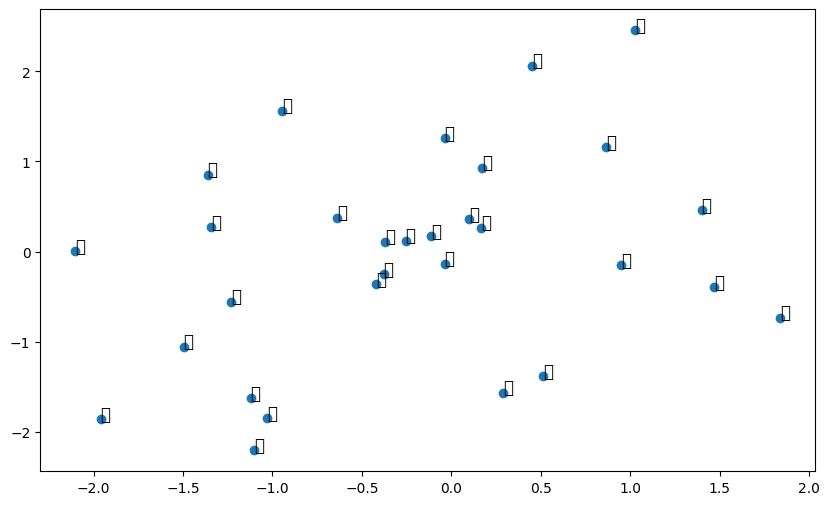

In [ ]:
random_words = random.sample(word2vec, 30)
plt.figure(figsize=(10, 6))
plt.scatter([i[1][0] for i in random_words], [i[1][1] for i in random_words])
for item in random_words:
  word = item[0]
  plt.text(item[1][0], item[1][1], word, fontdict={'fontsize':12})
plt.show()